In [1]:
import numpy as np
import pandas as pd

path = r'~/Documents/DRUG-DISCOVERY/QSAR-modeling/DataModel/'

df = pd.read_csv(path + "Train_aurora.csv", header=0)
# df = pd.read_csv(path +"Train_ER_alpha.smi" ,sep= "\t")
# df = df.ix[:,0] # select first column
ID = df.molecule_chembl_id
STATUS = df.STATUS
smiles = df.SMILES_desalt
smiles.to_csv('smiles/Aurora_smi_only.smi', header=False, index=False)
len(smiles)

1707

In [2]:
# Rule Of 5 /Calculate descriptors
import rdkit
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem import MolFromSmiles

mols = []

for i in df.canonical_smiles:
        mol = MolFromSmiles(i)
        mols.append(mol)
MW = [Descriptors.MolWt(n) for n in mols]
LogP = [Descriptors.MolLogP(o) for o in mols]
nHAcc = [Descriptors.NumHAcceptors(p) for p in mols]
nHDon = [Descriptors.NumHDonors(q) for q in mols]

data = pd.DataFrame(
    {'molecule_chembl_id': ID,
     'STATUS' : STATUS,
     'MW': MW, 
     'LogP': LogP,
     'nHAcc': nHAcc,
     'nHDon': nHDon
    })



data = data[['molecule_chembl_id','STATUS','MW','LogP','nHAcc','nHDon']]

data.to_csv('~/Documents/DRUG-DISCOVERY/QSAR-modeling/SubFiles/Aurora_RO5.csv', sep=',' ,index=False)


In [3]:
len(data)

1707

In [4]:
data.head(4)

,molecule_chembl_id,STATUS,MW,LogP,nHAcc,nHDon
0,CHEMBL425904,Intermediate,374.832,2.97458,6,2
1,CHEMBL192161,Inactive,373.800,3.06098,6,2
2,CHEMBL204318,Active,495.584,3.40180,10,2
3,CHEMBL203507,Active,516.562,2.92040,11,2


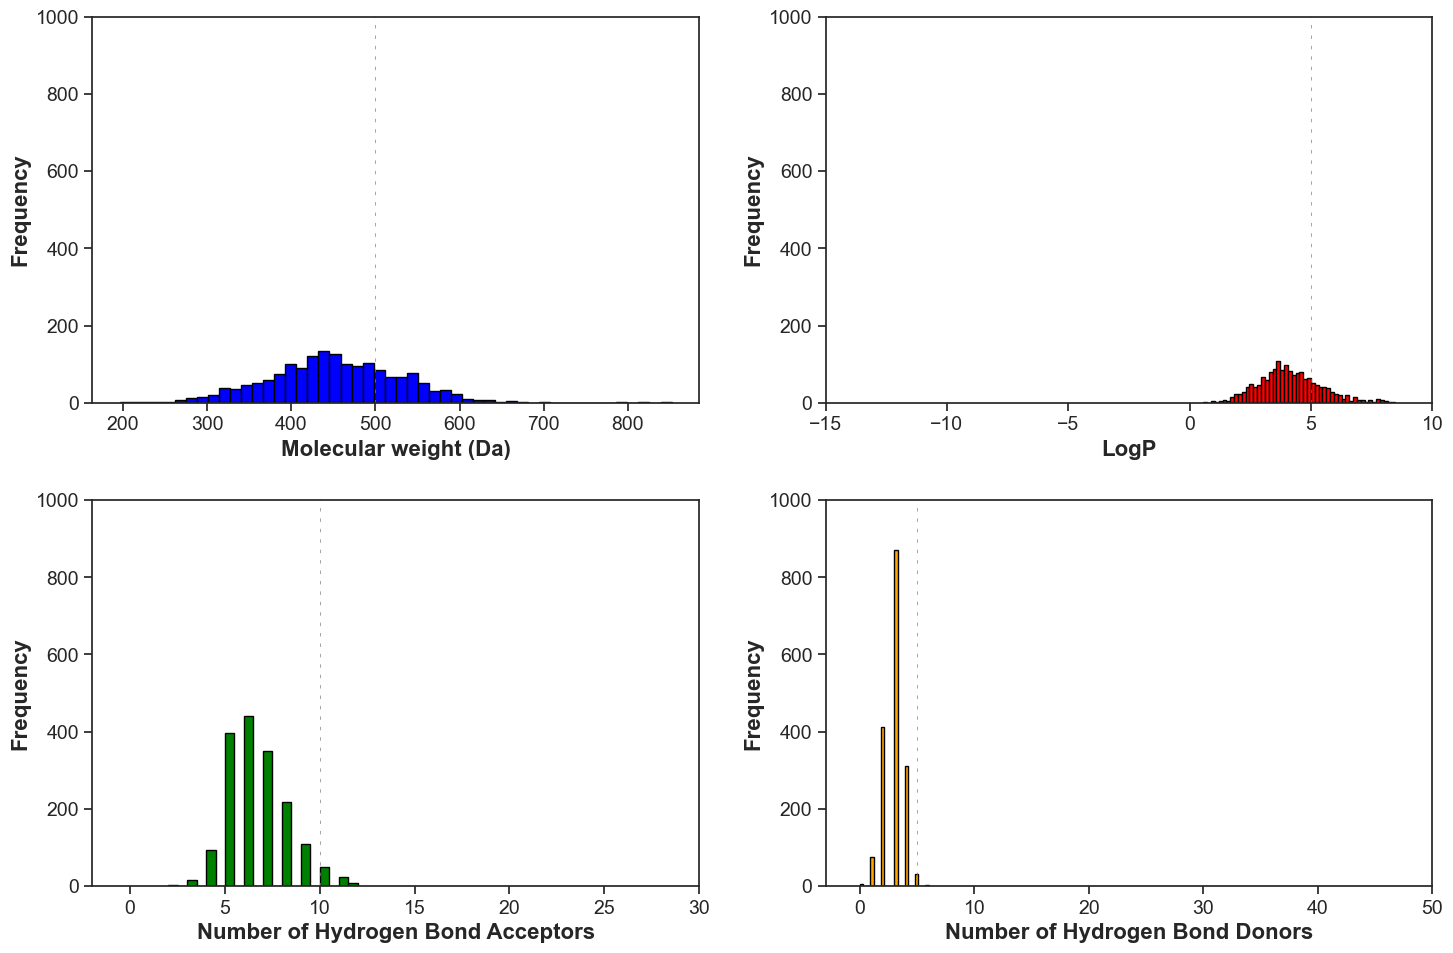

In [68]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

figure, ((plt1,plt2), (plt3,plt4)) = plt.subplots(2, 2)
figure.set_size_inches(15,10)
#---------------------------------------------------------------------------------------------------------
# Histogram for MW
hist, bins = np.histogram(MW, 50)
width = 1 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt1.bar(center, hist, align='center', width=width, color='blue',edgecolor='black',\
         error_kw=dict(ecolor='gray', lw=2, capsize=5, capthick=2,linestyle='-', linewidth=0.5))
plt1.set_xlabel('Molecular weight (Da)', fontsize=16, fontweight='bold')
plt1.set_ylabel('Frequency', fontsize=16, fontweight='bold')
plt1.tick_params(axis='both', which='major', labelsize=14)
#plt1.set_xlim(200,900)
plt1.set_ylim(0, 1000)
#plt1.grid(True)
plt1.axvline(500, color='gray',linestyle='--', dashes=(5, 10), linewidth=0.5)
#---------------------------------------------------------------------------------------------------------
# Histogram for LogP
hist, bins = np.histogram(LogP, 50)
width = 1 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt2.bar(center, hist, align='center', width=width, color='red',edgecolor='black',\
         error_kw=dict(ecolor='gray', lw=2, capsize=5, capthick=2,linestyle='-', linewidth=0.5))
plt2.set_xlabel('LogP', fontsize=16, fontweight='bold')
plt2.set_ylabel('Frequency', fontsize=16, fontweight='bold')
plt2.tick_params(axis='both', which='major', labelsize=14)
plt2.set_xlim(-15,10)
plt2.set_ylim(0,1000)
#plt2.grid(True)
plt2.axvline(5, color='gray',linestyle='--', dashes=(5, 10), linewidth=0.5)
#---------------------------------------------------------------------------------------------------------
    
# Histogram for nHAcc
hist, bins = np.histogram(nHAcc, 20)
width = 1 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt3.bar(center, hist, align='center', width=width, color='green',edgecolor='black',\
         error_kw=dict(ecolor='gray', lw=2, capsize=5, capthick=2, linestyle='-', linewidth=0.5))
plt3.set_xlabel('Number of Hydrogen Bond Acceptors', fontsize=16, fontweight='bold')
plt3.set_ylabel('Frequency', fontsize=16, fontweight='bold')
plt3.tick_params(axis='both', which='major', labelsize=14)
plt3.set_xlim(-2,30)
plt3.set_ylim(0,1000)
#plt3.grid(True)
plt3.axvline(10, color='gray',linestyle='--', dashes=(5, 10), linewidth=0.5)
#---------------------------------------------------------------------------------------------------------

# Histogram for nHDon
hist, bins = np.histogram(nHDon, 20)
width = 1 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt4.bar(center, hist, align='center', width=width, color='orange',edgecolor='black',\
         error_kw=dict(ecolor='gray', lw=2, capsize=5, capthick=2, linestyle='-', linewidth=0.5))
plt4.set_xlabel('Number of Hydrogen Bond Donors', fontsize=16, fontweight='bold')
plt4.set_ylabel('Frequency', fontsize=16, fontweight='bold')
plt4.tick_params(axis='both', which='major', labelsize=14)
plt4.set_xlim(-3,50)
plt4.set_ylim(0,1000)
#plt4.grid(True)
plt4.axvline(5, color='gray',linestyle='--', dashes=(5, 10), linewidth=0.5)

plt.tight_layout(pad=2.0, w_pad=2.0, h_pad=2.0)
plt.savefig('/Users/zahramusavizadeh/Documents/DRUG-DISCOVERY/QSAR-modeling/Result/histogram plots of the descriptors.jpg', dpi=300)

In [14]:
data.max()

molecule_chembl_id    CHEMBL609040
STATUS                Intermediate
MW                         851.981
LogP                        8.4694
nHAcc                           12
nHDon                            6
dtype: object

In [15]:
data.min()

molecule_chembl_id    CHEMBL1077729
STATUS                       Active
MW                          196.209
LogP                         0.5653
nHAcc                             2
nHDon                             0
dtype: object

In [16]:
df.head(3)

,molecule_chembl_id,canonical_smiles,standard_value,SMILES_desalt,STATUS
0,CHEMBL425904,CC(CN(C)C)Oc1ccc(Cl)cc1NC(=O)Nc1cnc(C#N)cn1,3229.0,CC(CN(C)C)Oc1ccc(Cl)cc1NC(=O)Nc1cnc(C#N)cn1,Intermediate
1,CHEMBL192161,CC1(COc2ccc(Cl)cc2NC(=O)Nc2cnc(C#N)cn2)COC1,10000.0,CC1(COc2ccc(Cl)cc2NC(=O)Nc2cnc(C#N)cn2)COC1,Inactive
2,CHEMBL204318,CCCCC(=O)Nc1ncc(Nc2ncnc3cc(OCCCN4CCOCC4)c(OC)c...,17.0,CCCCC(=O)Nc1ncc(Nc2ncnc3cc(OCCCN4CCOCC4)c(OC)c...,Active


In [17]:
df2 = pd.concat([data.set_index('molecule_chembl_id'),df.set_index('molecule_chembl_id')], axis=1, join='inner')
df2.head(5)


,STATUS,MW,LogP,nHAcc,nHDon,canonical_smiles,standard_value,SMILES_desalt,STATUS
molecule_chembl_id,,,,,,,,,
CHEMBL425904,Intermediate,374.832,2.97458,6,2,CC(CN(C)C)Oc1ccc(Cl)cc1NC(=O)Nc1cnc(C#N)cn1,3229.0,CC(CN(C)C)Oc1ccc(Cl)cc1NC(=O)Nc1cnc(C#N)cn1,Intermediate
CHEMBL192161,Inactive,373.800,3.06098,6,2,CC1(COc2ccc(Cl)cc2NC(=O)Nc2cnc(C#N)cn2)COC1,10000.0,CC1(COc2ccc(Cl)cc2NC(=O)Nc2cnc(C#N)cn2)COC1,Inactive
CHEMBL204318,Active,495.584,3.40180,10,2,CCCCC(=O)Nc1ncc(Nc2ncnc3cc(OCCCN4CCOCC4)c(OC)c...,17.0,CCCCC(=O)Nc1ncc(Nc2ncnc3cc(OCCCN4CCOCC4)c(OC)c...,Active
CHEMBL203507,Active,516.562,2.92040,11,2,COc1cc2c(Nc3cnc(NC(=O)c4ccncc4)nc3)ncnc2cc1OCC...,690.0,COc1cc2c(Nc3cnc(NC(=O)c4ccncc4)nc3)ncnc2cc1OCC...,Active
CHEMBL206374,Intermediate,678.816,4.33610,12,2,CCCN(CCC)S(=O)(=O)c1ccc(C(=O)Nc2ncc(Nc3ncnc4cc...,3900.0,CCCN(CCC)S(=O)(=O)c1ccc(C(=O)Nc2ncc(Nc3ncnc4cc...,Intermediate


In [18]:
RO5= df2.T.drop_duplicates().T
RO5.head(3)
len(RO5)

1707

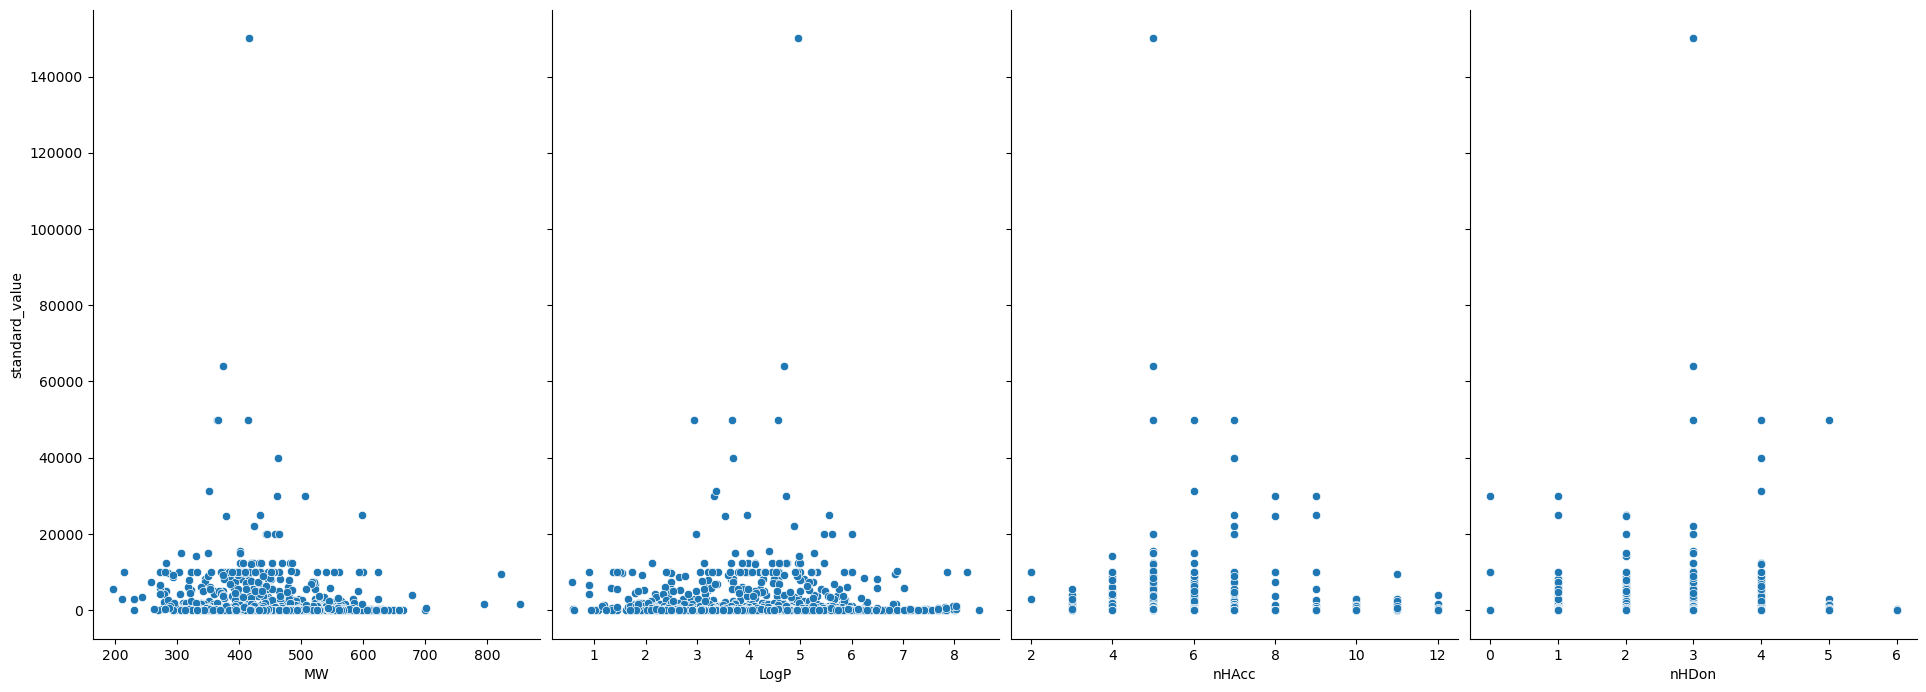

In [19]:
import seaborn as sns

# visualize the relationship between the features and the response using scatterplots
sns.pairplot(RO5, x_vars= ['MW','LogP','nHAcc','nHDon'], y_vars= ['standard_value'], height=7, aspect=0.7)
plt.show()

In [64]:
# Remove Outlier

RO5 =   RO5[RO5.MW.between(200, 700, inclusive=True)  &
        RO5.LogP.between(-1, 8, inclusive=True)   &
        RO5.nHAcc.between(0, 12, inclusive=True) &
        RO5.nHDon.between(0, 6, inclusive=True)] # The inclusive (True: <=, False: <)

len(RO5)

/var/folders/j5/x5zjmsdn2jqdnz5jwrvhzq5h0000gn/T/ipykernel_2815/2237507380.py:3: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  RO5 =   RO5[RO5.MW.between(200, 700, inclusive=True)  &
/var/folders/j5/x5zjmsdn2jqdnz5jwrvhzq5h0000gn/T/ipykernel_2815/2237507380.py:4: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  RO5.LogP.between(-1, 8, inclusive=True)   &
/var/folders/j5/x5zjmsdn2jqdnz5jwrvhzq5h0000gn/T/ipykernel_2815/2237507380.py:5: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  RO5.nHAcc.between(0, 12, inclusive=True) &
/var/folders/j5/x5zjmsdn2jqdnz5jwrvhzq5h0000gn/T/ipykernel_2815/2237507380.py:6: FutureWarning: Boolean inputs to the `inclusive` argument are deprecated in favour of `both` or `neither`.
  RO5.nHDon.between(0, 6, inclusive=True)] # The inclusive (True: <=, False: <)


1696

In [48]:
# Convert IC50 to pIC 50

from math import log10
import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-log10(molar))
    #Y = pIC50

    input['pIC50'] = pIC50
    input = input.drop('standard_value',axis= 1)
        
    return input

In [49]:
pIC50(RO5)
RO5.head(2)

,STATUS,MW,LogP,nHAcc,nHDon,canonical_smiles,standard_value,SMILES_desalt,pIC50,molecule_chembl_id
molecule_chembl_id,,,,,,,,,,
CHEMBL425904,Intermediate,374.832,2.97458,6,2,CC(CN(C)C)Oc1ccc(Cl)cc1NC(=O)Nc1cnc(C#N)cn1,3229.0,CC(CN(C)C)Oc1ccc(Cl)cc1NC(=O)Nc1cnc(C#N)cn1,5.490932,CHEMBL425904
CHEMBL192161,Inactive,373.8,3.06098,6,2,CC1(COc2ccc(Cl)cc2NC(=O)Nc2cnc(C#N)cn2)COC1,10000.0,CC1(COc2ccc(Cl)cc2NC(=O)Nc2cnc(C#N)cn2)COC1,5.000000,CHEMBL192161


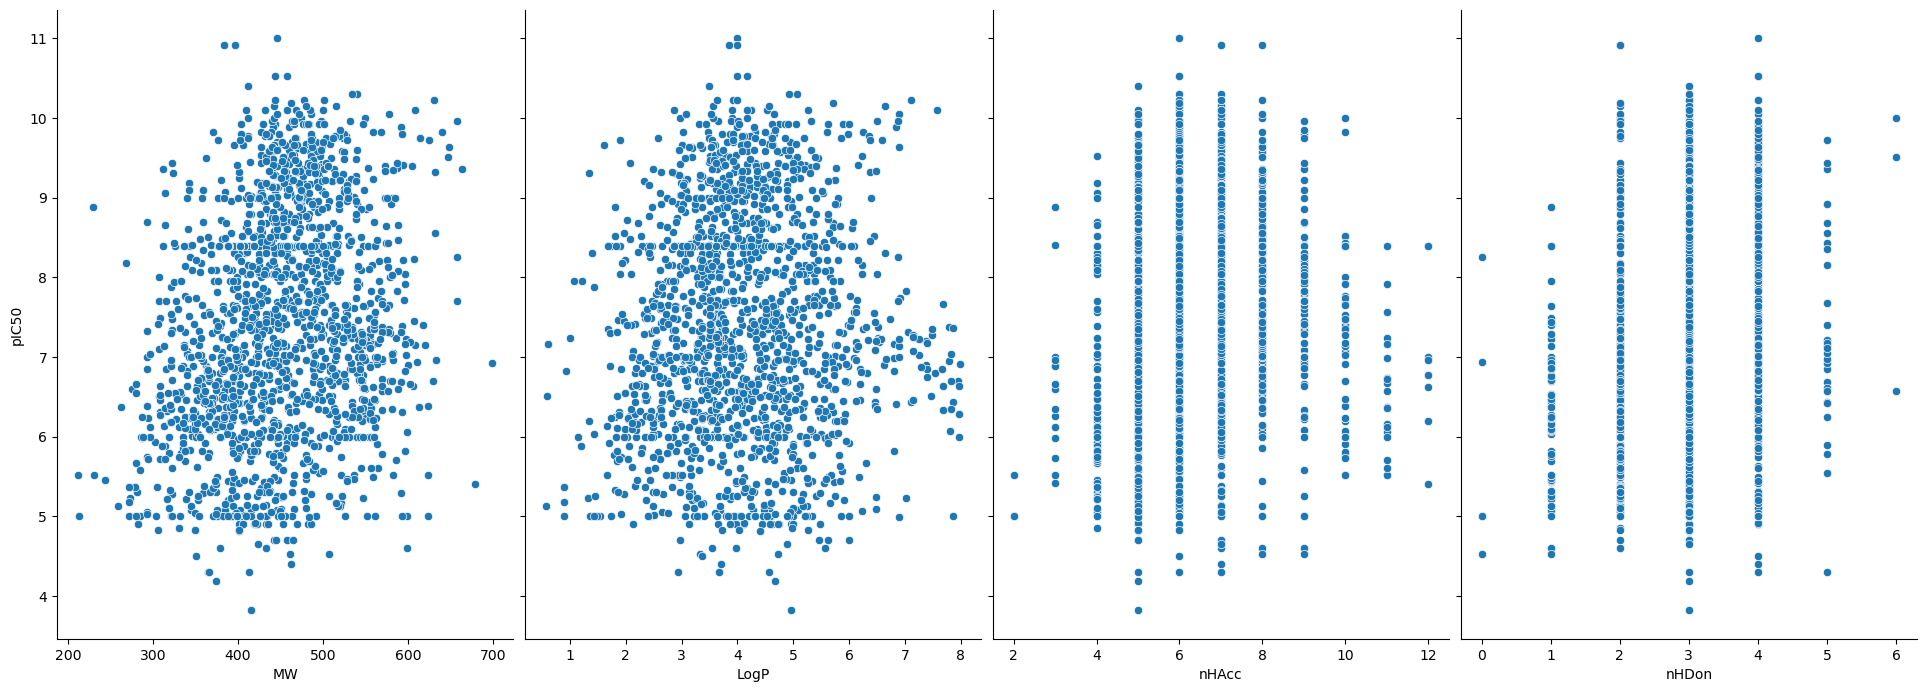

In [23]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(RO5, x_vars=['MW','LogP','nHAcc','nHDon'], y_vars='pIC50', height=7, aspect=0.7)

In [24]:
RO5['molecule_chembl_id'] = RO5.index
Aurora_final = RO5[['canonical_smiles','molecule_chembl_id']]

Aurora_final.to_csv('Smiles/Aurora-final.smi', sep='\t' ,header=False ,index=False)

In [25]:
RO5.to_csv   ('DataModel/Aurora_final.csv'   , sep=',' ,index=False)

In [26]:
Aurora_final


,canonical_smiles,molecule_chembl_id
molecule_chembl_id,,
CHEMBL425904,CC(CN(C)C)Oc1ccc(Cl)cc1NC(=O)Nc1cnc(C#N)cn1,CHEMBL425904
CHEMBL192161,CC1(COc2ccc(Cl)cc2NC(=O)Nc2cnc(C#N)cn2)COC1,CHEMBL192161
CHEMBL204318,CCCCC(=O)Nc1ncc(Nc2ncnc3cc(OCCCN4CCOCC4)c(OC)c...,CHEMBL204318
CHEMBL203507,COc1cc2c(Nc3cnc(NC(=O)c4ccncc4)nc3)ncnc2cc1OCC...,CHEMBL203507
CHEMBL206374,CCCN(CCC)S(=O)(=O)c1ccc(C(=O)Nc2ncc(Nc3ncnc4cc...,CHEMBL206374
...,...,...
CHEMBL514499,COc1cc2ncn(-c3cc(OCc4ccccc4C(F)(F)F)c(C(N)=O)s...,CHEMBL514499
CHEMBL3808844,CCOc1cn(-c2ccc(F)cc2C)nc1C(=O)Nc1ccc(Oc2ccnc3c...,CHEMBL3808844
CHEMBL3990456,Cn1cc(-c2[nH]c3cc(NC(=O)[C@H](N)C4CCCCC4)cc4c3...,CHEMBL3990456


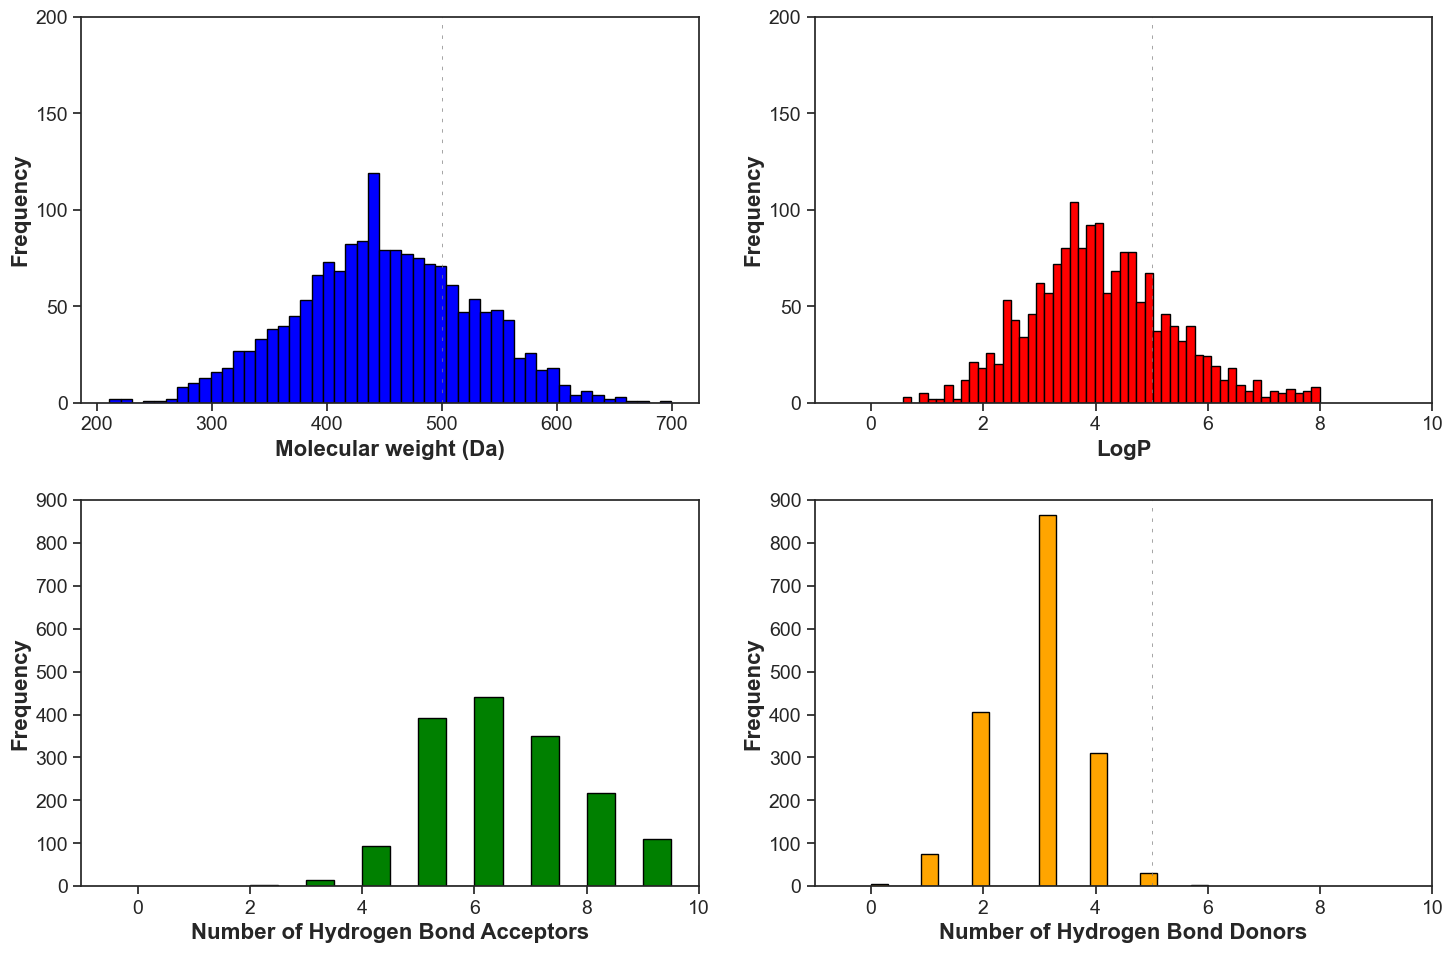

In [69]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker

figure, ((plt1,plt2), (plt3,plt4)) = plt.subplots(2, 2)
figure.set_size_inches(15,10)

loc = plticker.MultipleLocator(base=50.0) # this locator puts ticks at regular intervals
#--------------------------------------------------------------------------------------------------------------
# Histogram for MW
hist, bins = np.histogram(RO5.MW, 50)
width = 1 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt1.bar(center, hist, align='center', width=width, color='blue',edgecolor='black',\
         error_kw=dict(ecolor='gray', lw=2, capsize=5, capthick=2,linestyle='-', linewidth=0.5))
plt1.yaxis.set_major_locator(loc)
plt1.set_xlabel('Molecular weight (Da)', fontsize=16, fontweight='bold')
plt1.set_ylabel('Frequency', fontsize=16, fontweight='bold')
plt1.tick_params(axis='both', which='major', labelsize=14)
#plt1.set_xlim(200,900)
plt1.set_ylim(0, 200)
#plt1.grid(True)
plt1.axvline(500, color='gray',linestyle='--', dashes=(5, 10), linewidth=0.5)
#--------------------------------------------------------------------------------------------------------------
# Histogram for LogP
hist, bins = np.histogram(RO5.LogP, 50)
width = 1 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt2.bar(center, hist, align='center', width=width, color='red',edgecolor='black',\
         error_kw=dict(ecolor='gray', lw=2, capsize=5, capthick=2,linestyle='-', linewidth=0.5))
plt2.yaxis.set_major_locator(loc)
plt2.set_xlabel('LogP', fontsize=16, fontweight='bold')
plt2.set_ylabel('Frequency', fontsize=16, fontweight='bold')
plt2.tick_params(axis='both', which='major', labelsize=14)
plt2.set_xlim(-1,10)
plt2.set_ylim(0,200)
#plt2.grid(True)
plt2.axvline(5, color='gray',linestyle='--', dashes=(5, 10), linewidth=0.5)
#--------------------------------------------------------------------------------------------------------------    
# Histogram for nHAcc
hist, bins = np.histogram(RO5.nHAcc, 20)
width = 1 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt3.bar(center, hist, align='center', width=width, color='green',edgecolor='black',\
         error_kw=dict(ecolor='gray', lw=2, capsize=5, capthick=2, linestyle='-', linewidth=0.5))
#plt3.yaxis.set_major_locator(loc) 
plt3.set_xlabel('Number of Hydrogen Bond Acceptors', fontsize=16, fontweight='bold')
plt3.set_ylabel('Frequency', fontsize=16, fontweight='bold')
plt3.tick_params(axis='both', which='major', labelsize=14)
plt3.set_xlim(-1,10)
plt3.set_ylim(0,900)
#plt3.grid(True)
plt3.axvline(10, color='gray',linestyle='--', dashes=(5, 10), linewidth=0.5)
#--------------------------------------------------------------------------------------------------------------
# Histogram for nHDon
hist, bins = np.histogram(RO5.nHDon, 20)
width = 1 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt4.bar(center, hist, align='center', width=width, color='orange',edgecolor='black',\
         error_kw=dict(ecolor='gray', lw=2, capsize=5, capthick=2, linestyle='-', linewidth=0.5))
#plt4.yaxis.set_major_locator(loc)
plt4.set_xlabel('Number of Hydrogen Bond Donors', fontsize=16, fontweight='bold')
plt4.set_ylabel('Frequency', fontsize=16, fontweight='bold')
plt4.tick_params(axis='both', which='major', labelsize=14)
plt4.set_xlim(-1,10)
plt4.set_ylim(0,900)
#plt4.grid(True)
plt4.axvline(5, color='gray',linestyle='--', dashes=(5, 10), linewidth=0.5)

plt.tight_layout(pad=2.0, w_pad=2.0, h_pad=2.0)
plt.savefig('Result/Aurora-the histogram plots of the descriptors select.jpg', dpi=300)

In [28]:
RO5.head(2)

,STATUS,MW,LogP,nHAcc,nHDon,canonical_smiles,standard_value,SMILES_desalt,pIC50,molecule_chembl_id
molecule_chembl_id,,,,,,,,,,
CHEMBL425904,Intermediate,374.832,2.97458,6,2,CC(CN(C)C)Oc1ccc(Cl)cc1NC(=O)Nc1cnc(C#N)cn1,3229.0,CC(CN(C)C)Oc1ccc(Cl)cc1NC(=O)Nc1cnc(C#N)cn1,5.490932,CHEMBL425904
CHEMBL192161,Inactive,373.8,3.06098,6,2,CC1(COc2ccc(Cl)cc2NC(=O)Nc2cnc(C#N)cn2)COC1,10000.0,CC1(COc2ccc(Cl)cc2NC(=O)Nc2cnc(C#N)cn2)COC1,5.000000,CHEMBL192161


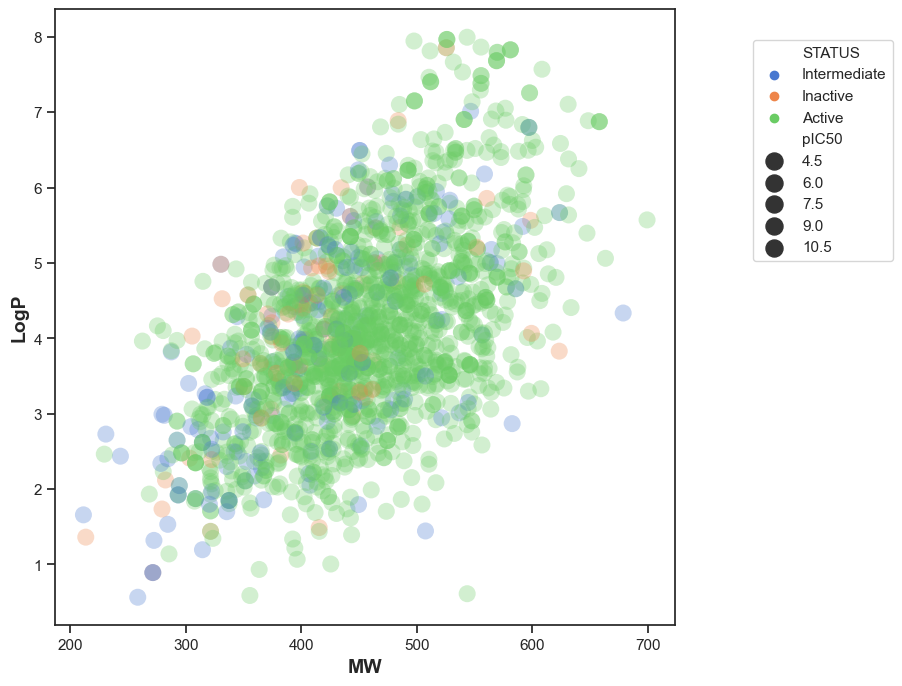

In [66]:
#Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
sns.scatterplot(x='MW', y='LogP', data=RO5, hue='STATUS',sizes=(150, 150),
                size='pIC50', edgecolor='none', alpha=0.3, palette="muted")

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.4, 1), loc=1, borderaxespad=2)

plt.savefig('/Users/zahramusavizadeh/Documents/DRUG-DISCOVERY/QSAR-modeling/Result/plot_MW_vs_LogP.jpg', dpi=300)

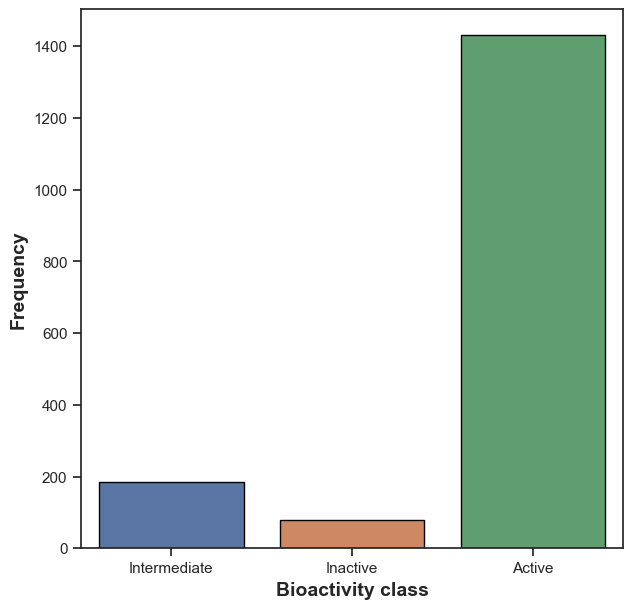

In [70]:
plt.figure(figsize=(7, 7))

sns.countplot(x='STATUS', data=RO5, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.savefig('/Users/zahramusavizadeh/Documents/DRUG-DISCOVERY/QSAR-modeling/Result/plot_bioactivity.pdf',dpi=300)
plt.show()

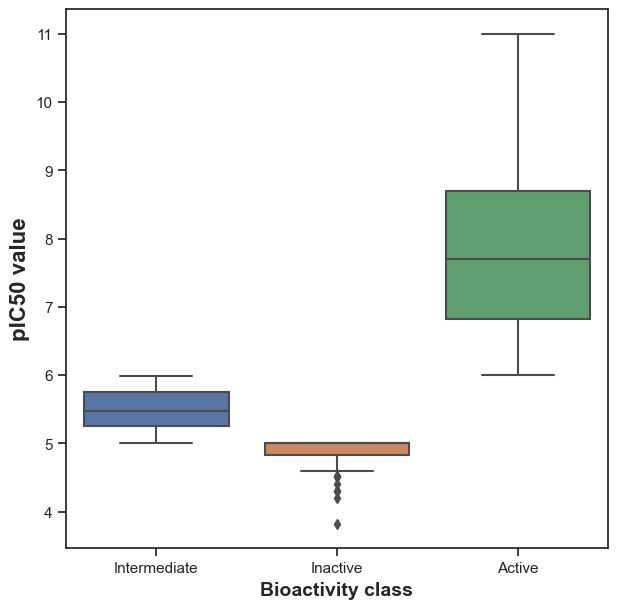

In [71]:
#Box plots -pIC50 value
plt.figure(figsize=(7, 7))

sns.boxplot(x = 'STATUS', y = 'pIC50', data = RO5)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=16, fontweight='bold')
plt.savefig('/Users/zahramusavizadeh/Documents/DRUG-DISCOVERY/QSAR-modeling/Result/plot_ic50.jpg',dpi=300)
plt.show()

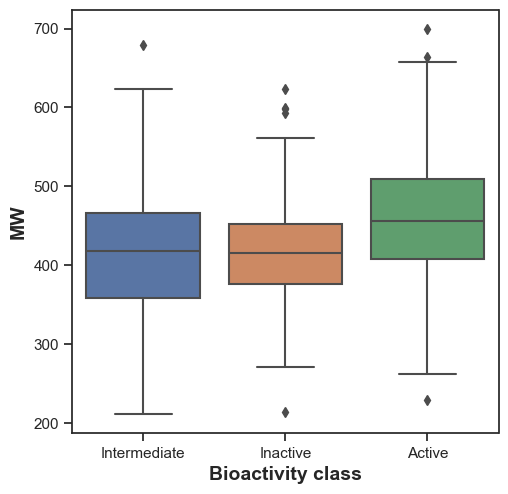

In [72]:
#MW
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'STATUS', y = 'MW', data = RO5)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('/Users/zahramusavizadeh/Documents/DRUG-DISCOVERY/QSAR-modeling/Result/plot_MW.jpg',dpi=300)


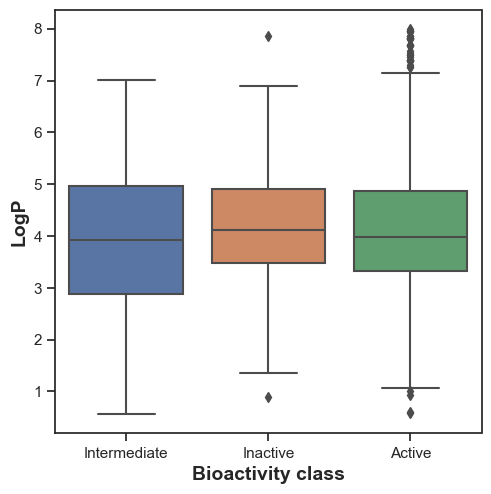

In [73]:
#LogP
plt.figure(figsize=(5.5, 5.5))
sns.boxplot(x = 'STATUS', y = 'LogP', data = RO5)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.savefig('/Users/zahramusavizadeh/Documents/DRUG-DISCOVERY/QSAR-modeling/Result/plot_LogP.jpg',dpi=300)


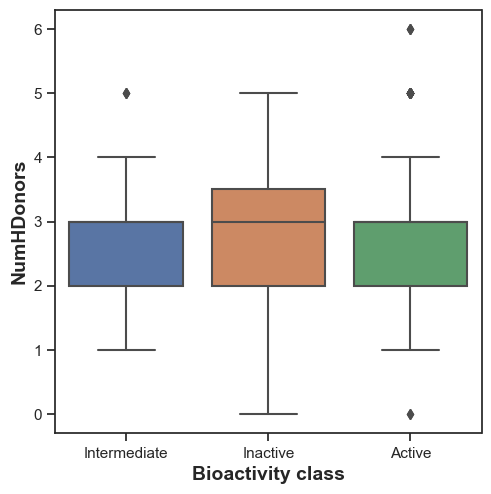

In [74]:
#NumHDonors
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'STATUS', y = 'nHDon', data = RO5)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')
plt.savefig('/Users/zahramusavizadeh/Documents/DRUG-DISCOVERY/QSAR-modeling/Result/plot_NumHDonors.jpg',dpi=300)

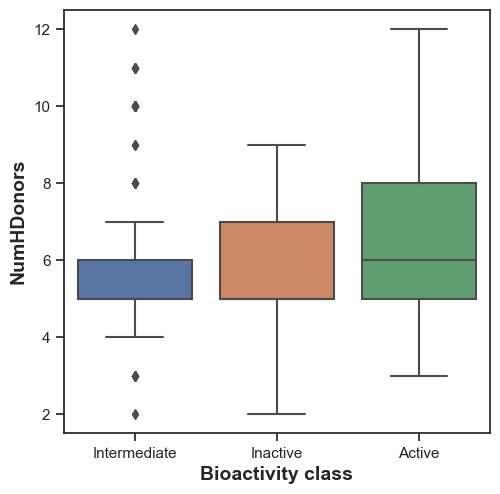

In [75]:
#NumHDonors
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'STATUS', y = 'nHAcc', data = RO5)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')
plt.savefig('/Users/zahramusavizadeh/Documents/DRUG-DISCOVERY/QSAR-modeling/Result/plot_NumHAcceptors.jpg',dpi=300)